In [1]:
import pandas as pd
import numpy as np

## 데이터 불러오기

In [3]:
df = pd.read_csv("mtcars.csv")
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
# 변수들의 데이터 타입 확인
df.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [5]:
#데이터 타입 변경
df1=df.copy() #df1이라는 변수에 df copy함 / df가 변해도 df1은 안 변함.
df1=df1.astype({'cyl':'object'}) # 데이터 타입 변경
print(df1.dtypes)

model     object
mpg      float64
cyl       object
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object


In [6]:
df1 = df1.astype({'cyl':'int','gear':'object'})
print(df1.dtypes)

model     object
mpg      float64
cyl        int32
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear      object
carb       int64
dtype: object


In [7]:
df1['cyl']

0     6
1     6
2     4
3     6
4     8
5     6
6     8
7     4
8     4
9     6
10    6
11    8
12    8
13    8
14    8
15    8
16    8
17    4
18    4
19    4
20    4
21    8
22    8
23    8
24    8
25    4
26    4
27    4
28    8
29    6
30    8
31    4
Name: cyl, dtype: int32

In [8]:
df1['cyl'].value_counts() #8이 14개, 4가 11개, 6이 7개 존재

8    14
4    11
6     7
Name: cyl, dtype: int64

In [9]:
df.shape #행, 열 확인 가능

(32, 12)

In [10]:
#평균값 구하기
mpg_mean = df['mpg'].mean()

In [11]:
print(mpg_mean)

20.090624999999996


In [12]:
#중앙값 구하기
mpg_median = df['mpg'].median()

In [13]:
print(mpg_median)

19.2


In [15]:
#최빈값 구하기
mpg_mode = df['cyl'].mode()
print(mpg_mode)

0    8
dtype: int64


In [17]:
print(mpg_mode[0])

8


In [18]:
df['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

## 분산, 표준편차, IQR, 범위 등

In [19]:
#분산
mpg_var = df['mpg'].var()
print(mpg_var)

36.32410282258065


In [20]:
#표준편차
mpg_std = df['mpg'].std()
print(mpg_std)

6.026948052089105


In [21]:
#IQR
Q1 = df['mpg'].quantile(0.25)
print(Q1)

15.425


In [22]:
Q3 = df['mpg'].quantile(0.75)
print(Q3)

22.8


In [23]:
IQR = Q3-Q1
print(IQR)

7.375


In [24]:
Q2 = df['mpg'].quantile(0.5)
print(Q2)
print(df['mpg'].median())

19.2
19.2


In [25]:
mpg_max = df['mpg'].max()
print(mpg_max)

33.9


In [26]:
mpg_min = df['mpg'].min()
print(mpg_min)

10.4


In [27]:
mpg_range = mpg_max-mpg_min
print(mpg_range)

23.5


### 분포의 비대칭도

In [28]:
#왜도 : 좌우로 치우쳐진 정도 , 좌측으로 치우칠수록 + 
mpg_skew = df['mpg'].skew()
print(mpg_skew)

0.6723771376290805


In [29]:
#첨도 : 그래프의 뾰족함, 높을수록 뾰족
mpg_kurt = df['mpg'].kurt()
print(mpg_kurt)

-0.0220062914240855


### 합계, 절대값, 데이터 수 등

In [30]:
# 합계
mpg_sum = df['mpg'].sum()
print(mpg_sum)

642.9000000000001


In [31]:
IQR2 = Q1-Q3
print(IQR2)
print(abs(IQR2))

-7.375
7.375


In [32]:
#데이터 수
len(df['mpg'])

32

### 그룹화하여 계산하기 (groupby 활용)

In [33]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
#species 별로 각 변수의 평균 구하기
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [35]:
df.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


### 데이터 인덱싱, 필터링, 정렬, 변경 등

In [57]:
df = pd.read_csv('mtcars.csv')
df.head() #디폴트: 5개 데이터만, 괄호 안에 숫자 넣어서 가능

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [39]:
#행/열 인덱싱 : df,loc['행','열']
df.loc[3,'mpg']

21.4

In [40]:
#열만 인덱싱
df.loc[:,'mpg']

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

In [42]:
df.loc[0:3,['mpg','cyl','disp']]

,mpg,cyl,disp
0,21.0,6,160.0
1,21.0,6,160.0
2,22.8,4,108.0
3,21.4,6,258.0


In [44]:
df.loc[0:3,'mpg':'disp']

,mpg,cyl,disp
0,21.0,6,160.0
1,21.0,6,160.0
2,22.8,4,108.0
3,21.4,6,258.0


In [45]:
#뒤에서 n행 인덱싱
df.tail(2)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.78,18.6,1,1,4,2


### 열 (Columns) 추가/제거

In [46]:
# 열 선택
df_cyl = df['cyl']
df_cyl.head(3)

0    6
1    6
2    4
Name: cyl, dtype: int64

In [47]:
df_new = df[['cyl','mpg']]
df_new.head(3)

,cyl,mpg
0,6,21.0
1,6,21.0
2,4,22.8


In [51]:
#열 제거
df.drop(columns=['carb','mpg','cyl']).head(3)

,model,disp,hp,drat,wt,qsec,vs,am,gear
0,Mazda RX4,160.0,110,3.90,2.620,16.46,0,1,4
1,Mazda RX4 Wag,160.0,110,3.90,2.875,17.02,0,1,4
2,Datsun 710,108.0,93,3.85,2.320,18.61,1,1,4


In [52]:
#열 추가
df2 = df.copy()
df2['new'] = df['mpg']+10
df2.head(3)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,new
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,31.0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,31.0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,32.8


In [53]:
# cyl=4 인 데이터의 수
cond1 = (df['cyl']==4)
len(df[cond1])

11

In [54]:
df[ df['cyl']==4 ]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


In [55]:
#mpg가 22 이상인 데이터 수
cond2 = (df['mpg']>=22)
print(len(df[cond2]))

9


In [59]:
#2개 조건 필터링
df[cond1 & cond2]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


In [60]:
print(len(df[cond1&cond2]))

9


In [61]:
df[cond1|cond2]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


In [62]:
print(len(df[cond1|cond2]))

11


### 데이터 정렬

In [63]:
#내림차순 정렬
df.sort_values('mpg',ascending=False).head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1


In [64]:
#오름차순 정렬
df.sort_values('mpg',ascending=True).head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


### 데이터 변경(조건문)

In [67]:
import numpy as np
import pandas as pd
df=pd.read_csv('mtcars.csv')
#hp 변수 값 중에서 205가 넘는 값을 205로 처리하고, 나머지는 그대로 유지
df['hp']=np.where(df['hp']>=205,205,df['hp'])

# 내림차순 정렬
df.sort_values('hp',ascending=False).head(10)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
16,Chrysler Imperial,14.7,8,440.0,205,3.23,5.345,17.42,0,0,3,4
30,Maserati Bora,15.0,8,301.0,205,3.54,3.570,14.60,0,1,5,8
28,Ford Pantera L,15.8,8,351.0,205,4.22,3.170,14.50,0,1,5,4
6,Duster 360,14.3,8,360.0,205,3.21,3.570,15.84,0,0,3,4
23,Camaro Z28,13.3,8,350.0,205,3.73,3.840,15.41,0,0,3,4
15,Lincoln Continental,10.4,8,460.0,205,3.00,5.424,17.82,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3


### 결측치, 이상치, 중복값 처리 (제거 or 대체)

In [69]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [70]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [71]:
df.shape

(891, 15)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [73]:
#결측치 확인
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [75]:
#결측치 제거
print(df.dropna(axis=0).shape) #행 기준
print(df.dropna(axis=1).shape) #열 기준

(182, 15)
(891, 11)


In [76]:
#결측치 대체
#데이터 복사
df2=df.copy
df2=pd.DataFrame(df)

In [77]:
# 중앙값으로 대체

#중앙값 구하기
median_age = df2['age'].median()
print(median_age)

28.0


In [78]:
mean_age = df2['age'].mean()
print(mean_age)

29.69911764705882


In [79]:
#구한 중앙값으로 결측치를 대체
df2['age']=df['age'].fillna(median_age)

In [80]:
df2.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [81]:
print(df['age'].mean())
print(df2['age'].mean())

29.36158249158249
29.36158249158249


### 이상치 확인 및 처리

C:\Users\wldnj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

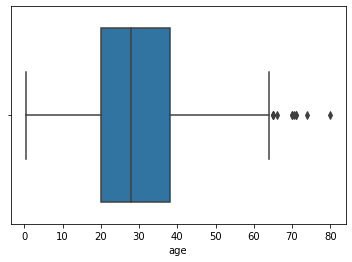

In [82]:
df = sns.load_dataset('titanic')
sns.boxplot(df['age'])

In [83]:
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

20.125 38.0 17.875


In [84]:
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(upper,lower)

64.8125 -6.6875


In [85]:
cond1 = (df['age']<=upper)
cond2 = (df['age']>=lower)
print(len(df[cond1 & cond2]))

703


In [86]:
print(df[cond1 & cond2])

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

### 표준정규분포 활용

In [87]:
mean_age = df['age'].mean()
std_age = df['age'].std()
print(mean_age)
print(std_age)

29.69911764705882
14.526497332334044


In [88]:
znorm = (df['age']-mean_age)/std_age
znorm

0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: age, Length: 891, dtype: float64

In [89]:
#문제 : 이상치의 개수는 몇 개인가? (+- 3Z 기준)
cond1 = (znorm>3)
len(df[cond1])
cond2 = (znorm<-3)
len(df[cond2])

0

In [90]:
print(len(df[cond1])+len(df[cond2]))

2


### 중복값 처리

In [91]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [92]:
#중복값이 있는 경우 제거
df1 = df.copy()
df1 = df1.drop_duplicates()
print(df1.shape)

(784, 15)


### 데이터 스케일링

In [93]:
df = pd.read_csv('mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [98]:
from sklearn.preprocessing import StandardScaler
zscaler = StandardScaler()
df['mpg'] = zscaler.fit_transform(df[['mpg']])
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,0.153299,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,0.153299,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,0.456737,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,0.220730,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,-0.234427,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [100]:
print(df['mpg'].mean(),df['mpg'].std())

-8.673617379884035e-18 1.016001016001524


In [101]:
df = pd.read_csv('mtcars.csv')
df.head()

from sklearn.preprocessing import MinMaxScaler
mscaler = MinMaxScaler()
df['mpg']=mscaler.fit_transform(df[['mpg']])
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,0.451064,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,0.451064,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,0.527660,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,0.468085,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,0.353191,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [102]:
print(df['mpg'].min(),df['mpg'].max())

0.0 1.0


### 데이터 합치기

In [103]:
#행, 열 방향으로 데이터 합치기
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [104]:
df1 = df.loc[0:30, ]
df2 = df.loc[31:60,]

In [105]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [106]:
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
31,5.4,3.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
34,4.9,3.1,1.5,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa


In [107]:
df_sum=pd.concat([df1,df2],axis=0) #행 방향으로 결합 (위, 아래)
print(df_sum.head())
print(df_sum.shape)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(61, 5)


In [108]:
df1 = df.loc[:,'sepal_length':'petal_length']
df2 = df.loc[:,['petal_width','species']]

In [109]:
df_sum=pd.concat([df1,df2],axis=1)
df_sum.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 날짜 데이터 다루기

In [111]:
df = pd.DataFrame( {
    '날짜': ['20230105','20230105','20230223','20230422','20230223','20230312','20230511'],
    '물품': ['A','B','A','B','A','B','A'],
    '판매수':[5,10,15,15,20,25,40],
    '개당수익':[500,600,500,600,600,700,600] 
})
df

,날짜,물품,판매수,개당수익
0,20230105,A,5,500
1,20230105,B,10,600
2,20230223,A,15,500
3,20230422,B,15,600
4,20230223,A,20,600
5,20230312,B,25,700
6,20230511,A,40,600


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      7 non-null      object
 1   물품      7 non-null      object
 2   판매수     7 non-null      int64 
 3   개당수익    7 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


In [113]:
# 데이터 타입 datetime으로 변경
df['날짜'] = pd.to_datetime(df['날짜'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      7 non-null      datetime64[ns]
 1   물품      7 non-null      object        
 2   판매수     7 non-null      int64         
 3   개당수익    7 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 352.0+ bytes


In [114]:
#년, 월, 일 변수(열) 추가하기
df['year'] = df['날짜'].dt.year
df['month'] = df['날짜'].dt.month
df['day'] = df['날짜'].dt.day

In [115]:
df

,날짜,물품,판매수,개당수익,year,month,day
0,2023-01-05,A,5,500,2023,1,5
1,2023-01-05,B,10,600,2023,1,5
2,2023-02-23,A,15,500,2023,2,23
3,2023-04-22,B,15,600,2023,4,22
4,2023-02-23,A,20,600,2023,2,23
5,2023-03-12,B,25,700,2023,3,12
6,2023-05-11,A,40,600,2023,5,11


In [116]:
#날짜 구간 필터링
df [df['날짜'].between('2023-01-01','2023-01-31')] #1월 31일은 미포함

,날짜,물품,판매수,개당수익,year,month,day
0,2023-01-05,A,5,500,2023,1,5
1,2023-01-05,B,10,600,2023,1,5


In [117]:
#날짜를 인덱스로 설정 후 loc 사용
df = pd.DataFrame( {
    '날짜': ['20230105','20230105','20230223','20230422','20230223','20230312','20230511'],
    '물품': ['A','B','A','B','A','B','A'],
    '판매수':[5,10,15,15,20,25,40],
    '개당수익':[500,600,500,600,600,700,600] 
})

#datetime으로 변경
df['날짜'] = pd.to_datetime(df['날짜'])

df = df.set_index('날짜')
df.head(3)

,물품,판매수,개당수익
날짜,,,
2023-01-05,A,5,500
2023-01-05,B,10,600
2023-02-23,A,15,500


In [118]:
print(df.loc['2023-01-05':'2023-02-23']) #둘다 기간 포함

           물품  판매수  개당수익
날짜                      
2023-01-05  A    5   500
2023-01-05  B   10   600
2023-02-23  A   15   500
2023-02-23  A   20   600


In [119]:
print(df.loc[ (df.index>='2023-01-05') & (df.index<='2023-02-23')])

           물품  판매수  개당수익
날짜                      
2023-01-05  A    5   500
2023-01-05  B   10   600
2023-02-23  A   15   500
2023-02-23  A   20   600


### 시간 다루기

In [120]:
#시간 데이터 만들기
df = pd.DataFrame( {
    '날짜': ['20230105','20230105','20230223','20230422','20230223','20230312','20230511'],
    '물품': ['A','B','A','B','A','B','A'],
    '판매수':[5,10,15,15,20,25,40],
    '개당수익':[500,600,500,600,600,700,600] 
})
time = pd.date_range('2023-09-24 12:25:00','2023-09-25 14:45:30',periods=7)
df['time'] = time
df=df[['time','물품','판매수','개당수익']]
df

,time,물품,판매수,개당수익
0,2023-09-24 12:25:00,A,5,500
1,2023-09-24 16:48:25,B,10,600
2,2023-09-24 21:11:50,A,15,500
3,2023-09-25 01:35:15,B,15,600
4,2023-09-25 05:58:40,A,20,600
5,2023-09-25 10:22:05,B,25,700
6,2023-09-25 14:45:30,A,40,600
